clustering after training by classifier

In [75]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import time

print(tf.__version__)  # 2.1.0

2.1.0


In [2]:
mnist = keras.datasets.mnist
(train_nums, train_labels), (test_nums, test_labels) = mnist.load_data()
train_nums.shape, test_nums.shape

((60000, 28, 28), (10000, 28, 28))

In [3]:
train_nums_flattened = np.array([x.flatten() for x in train_nums])
train_nums_flattened.shape

(60000, 784)

In [97]:
train_nums_flattened, train_labels

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([5, 0, 4, ..., 5, 6, 8], dtype=uint8))

In [101]:
tf.one_hot(train_labels, depth=10)

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)>

In [5]:
test_nums_flattened = np.array([y.flatten() for y in test_nums])
test_nums_flattened.shape

(10000, 784)

In [6]:
train_nums_flattened = train_nums_flattened / 255
test_nums_flattened = test_nums_flattened / 255

In [92]:
# m_part1 = keras.Sequential([keras.layers.Dense(150, activation='relu', input_shape=[784]),
#                                                             keras.layers.Dense(30, activation='relu'),
#                                                             keras.layers.Dense(5, activation='relu')])
# m_part2 = keras.Sequential(keras.layers.Dense(10, input_shape=[5]))
# model = keras.Sequential([m_part1, m_part2])

m_part1 = keras.Sequential([keras.layers.Dense(50, activation='relu', input_shape=[784]),
                                                            keras.layers.Dense(30, activation='relu')])
m_part2 = keras.Sequential([
    keras.layers.Dense(50, activation='relu', input_shape=[30]),
    keras.layers.Dense(10)])
model = keras.Sequential([m_part1, m_part2])

In [103]:
model.compile(optimizer='rmsprop', loss=keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [104]:
model.fit(train_nums_flattened, tf.one_hot(train_labels, depth=10), batch_size=64, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0246 - accuracy: 0.9929
Epoch 2/20
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0226 - accuracy: 0.9933
Epoch 3/20
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0211 - accuracy: 0.9935
Epoch 4/20
60000/60000 [==============================] - 2s 39us/sample - loss: 0.0193 - accuracy: 0.9945
Epoch 5/20
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0189 - accuracy: 0.9942
Epoch 6/20
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0177 - accuracy: 0.9948
Epoch 7/20
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0172 - accuracy: 0.9948
Epoch 8/20
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0172 - accuracy: 0.9948
Epoch 9/20
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0163 - accuracy: 0.9952
Epoch 10/20
60

In [95]:
test_loss, test_acc = model.evaluate(test_nums_flattened, test_labels, verbose=2)
test_loss, test_acc

10000/10000 - 0s - loss: 0.1387 - accuracy: 0.9720


(0.1386901392553649, 0.972)

In [71]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_13 (Sequential)   (None, 5)                 122435    
_________________________________________________________________
sequential_14 (Sequential)   (None, 10)                60        
Total params: 122,495
Trainable params: 122,495
Non-trainable params: 0
_________________________________________________________________


In [44]:
785*150 + 151*30

122280

In [72]:
train_nums_5d = m_part1.predict(train_nums_flattened)
train_nums_5d.shape

(60000, 5)

In [73]:
pca = PCA(n_components=2)
X_reduced_pca = pca.fit_transform(train_nums_5d)
X_reduced_pca.shape

(60000, 2)

In [32]:
def plot_reduced_mnist(X, labels, title, file_name=None):
    plt.figure(figsize=(15, 12))
    plt.scatter(X[:, 0], X[:, 1], c=labels)
    plt.colorbar()
    plt.title(title)
    plt.tight_layout()
    if file_name:
        plt.savefig(file_name, dpi=300)

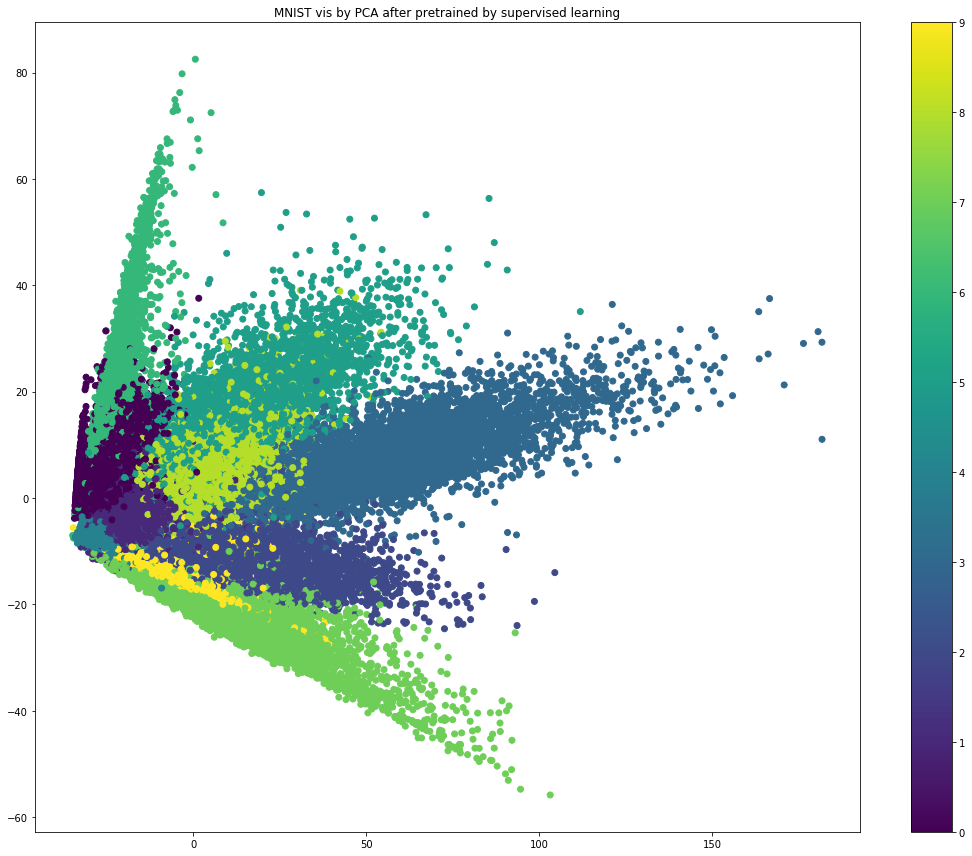

In [74]:
plot_reduced_mnist(X=X_reduced_pca, labels=train_labels, title='MNIST vis by PCA after pretrained by supervised learning', 
                                            file_name='mnist_pca_vis_after_pretrained_by_supervised_learning_5d_20epochs.png')

In [36]:
t0 = time.time()
tsne = TSNE(n_components=2, n_jobs=4)
X_reduced_tsne = tsne.fit_transform(train_nums_50d)
# X_reduced_tsne.shape
# np.save('X_reduced_tsne', X_reduced_tsne)
# X_reduced_tsne = np.load('X_reduced_tsne.npy')
t1 = time.time()
print(X_reduced_tsne.shape)
print("t-SNE took {:.1f}s.".format(t1 - t0))

(60000, 2)
t-SNE took 571.3s.


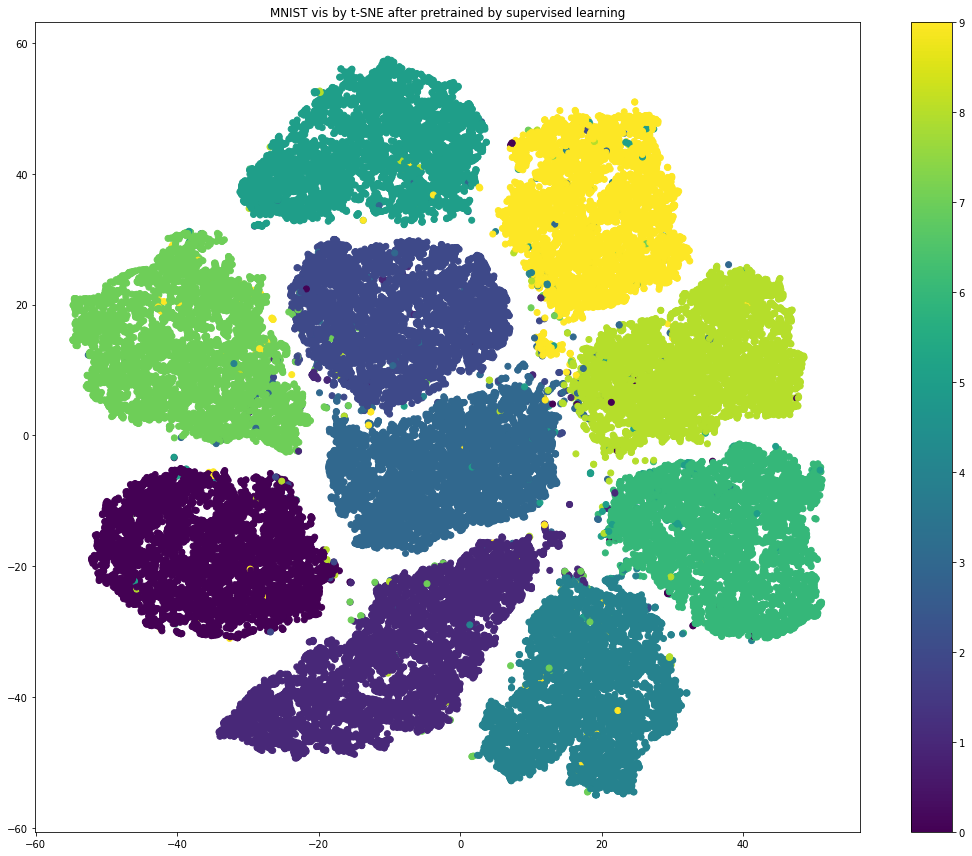

In [37]:
plot_reduced_mnist(X=X_reduced_tsne, labels=train_labels, title='MNIST vis by t-SNE after pretrained by supervised learning')

### clustering

In [76]:
# reduce dimension first by PCA, then do clustering
pca_95 = PCA(n_components=0.95)
X_reduced_pca_95 = pca_95.fit_transform(train_nums_flattened)
X_reduced_pca_95.shape

(60000, 154)

In [81]:
gm_models = {}

In [85]:
for i in range(14, 21):
    print('i is {}'.format(i))
    gm = GaussianMixture(n_components=i, n_init=10)
    gm.fit(X_reduced_pca_95)
    gm_models[i] = gm
    print('Converged is {}'.format(gm.converged_))
    print('AIC is {}'.format(gm.aic(X_reduced_pca_95)))

i is 14
Converged is True
AIC is -8290049.777870713
i is 15
Converged is True
AIC is -8566156.665915037
i is 16
Converged is True
AIC is -8797897.908531953
i is 17
Converged is True
AIC is -9126708.353475565
i is 18
Converged is True
AIC is -9339121.73573596
i is 19
Converged is True
AIC is -9589835.384824568
i is 20
Converged is True
AIC is -9745611.514550244


In [84]:
gm_models

{8: GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                 means_init=None, n_components=8, n_init=10,
                 precisions_init=None, random_state=None, reg_covar=1e-06,
                 tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                 weights_init=None),
 9: GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                 means_init=None, n_components=9, n_init=10,
                 precisions_init=None, random_state=None, reg_covar=1e-06,
                 tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                 weights_init=None),
 10: GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                 means_init=None, n_components=10, n_init=10,
                 precisions_init=None, random_state=None, reg_covar=1e-06,
                 tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                 weights_init=None),
 11: 

In [78]:
gm.converged_

True

In [79]:
gm.n_iter_

81

In [80]:
gm.aic(X_reduced_pca_95)

-2328126.0496878913